Identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style import set_palette
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("new_train.csv", sep=',')
df = pd.DataFrame(train_data)

In [3]:
dftNumeric = df.select_dtypes(include=['int64', 'float64'])
dftObject = df.select_dtypes(include=['object'])

In [4]:
dftObjcat = dftObject.columns
for i in dftObjcat:
    catlist = dftObject[i].unique()
    for j, val in enumerate(catlist):
        dftobjfinal = dftObject[i].replace({val:j+1},inplace=True)

In [5]:
df_Final = pd.concat([dftObject, dftNumeric], axis=1)

In [6]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_Final)

In [7]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [8]:
df_Final.drop(outlier_index, inplace=True)

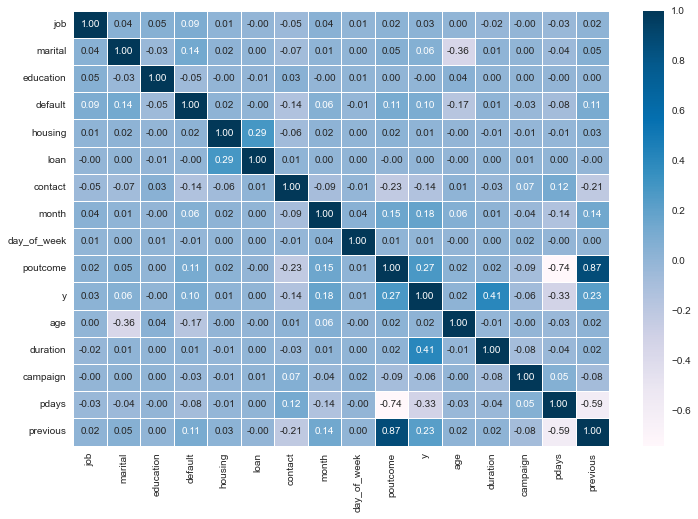

In [9]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_Final.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [10]:
corr = df_Final.corr()

In [11]:
dfmodel = df_Final.drop(['campaign','duration'], axis = 1)

In [12]:
x = dfmodel.drop(['y'], axis=1)

In [13]:
y = dfmodel['y']

In [14]:
x= preprocessing.StandardScaler().fit(x).transform(x)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (26140, 13) (26140,)
Validation set: (6536, 13) (6536,)


In [16]:
classifiers = [LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    KNeighborsClassifier(),           
    SVC(),
    MLPClassifier(),
    GaussianNB(),
    XGBClassifier()]

In [17]:
for i in classifiers:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('______________________________________________')
    print(i)
    print('..............................................')
    print('Train',model.score(X_train, y_train)*100)
    print('Test',model.score(X_test, y_test)*100)

______________________________________________
LogisticRegression(solver='liblinear')
..............................................
Train 89.78959449120121
Test 90.05507955936352
______________________________________________
RandomForestClassifier()
..............................................
Train 98.67635807192043
Test 88.72399020807833
______________________________________________
KNeighborsClassifier()
..............................................
Train 90.79571537872991
Test 88.83108935128519
______________________________________________
SVC()
..............................................
Train 90.08798775822494
Test 90.05507955936352
______________________________________________
MLPClassifier()
..............................................
Train 90.20275439938791
Test 89.73378212974296
______________________________________________
GaussianNB()
..............................................
Train 85.92960979342004
Test 86.2454100367197
_________________________________

In [18]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)
predicted = r_forest.predict(X_test)
score = r_forest.score(X_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.888


In [19]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94      5807
           2       0.50      0.24      0.33       729

    accuracy                           0.89      6536
   macro avg       0.70      0.61      0.63      6536
weighted avg       0.86      0.89      0.87      6536



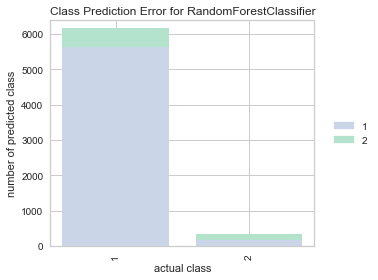

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [20]:
visualizer = ClassPredictionError(r_forest)
set_palette('pastel')
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)
visualizer.show()

In [21]:
datatest = pd.read_csv("new_test.csv", sep=',')
df_test = pd.DataFrame(datatest)
df_test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [23]:
predicted_test = r_forest.predict(df_test)
predicted_test

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)